NAME: Ujjwal Mahajan | 
MIS: 112107071 | 
Branch: ENTC | 
Batch: D


# DA PROJECT- IPL SCORE PREDICTOR

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load the dataset

In [195]:

ipl_df = pd.read_csv('ipl_data.csv')
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (76014, 15)


# Exploratory Data Analysis

In [196]:
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [197]:
ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [198]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [199]:
ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [200]:
ipl_df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# Data Visualisation

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


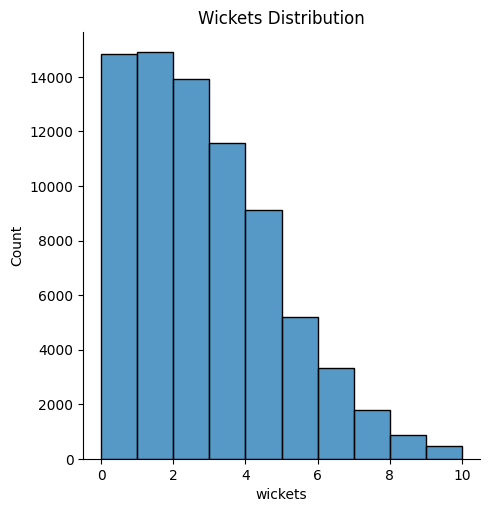

In [201]:
#1. Wickets Distribution
sns.displot(ipl_df['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


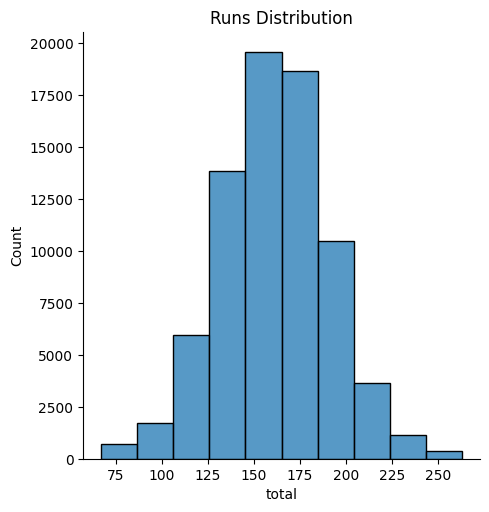

In [202]:
#2. Runs Distribution
sns.displot(ipl_df['total'],kde=False,bins=10)
plt.title("Runs Distribution")
plt.show()

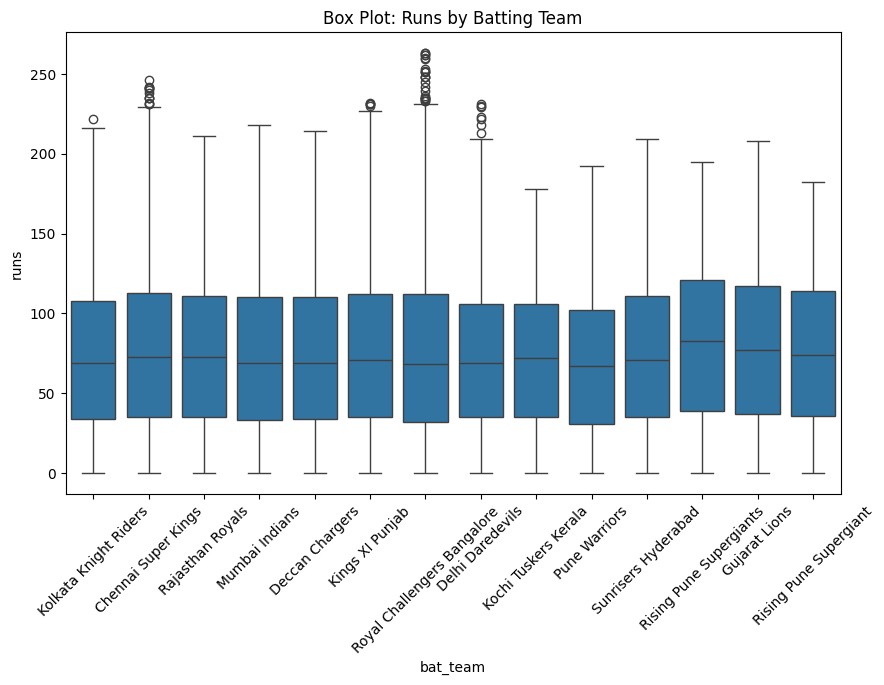

In [203]:
#3. Runs by the Batting team
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='bat_team', y='runs', data=ipl_df)
plt.title('Box Plot: Runs by Batting Team')
plt.xticks(rotation=45)
plt.show()

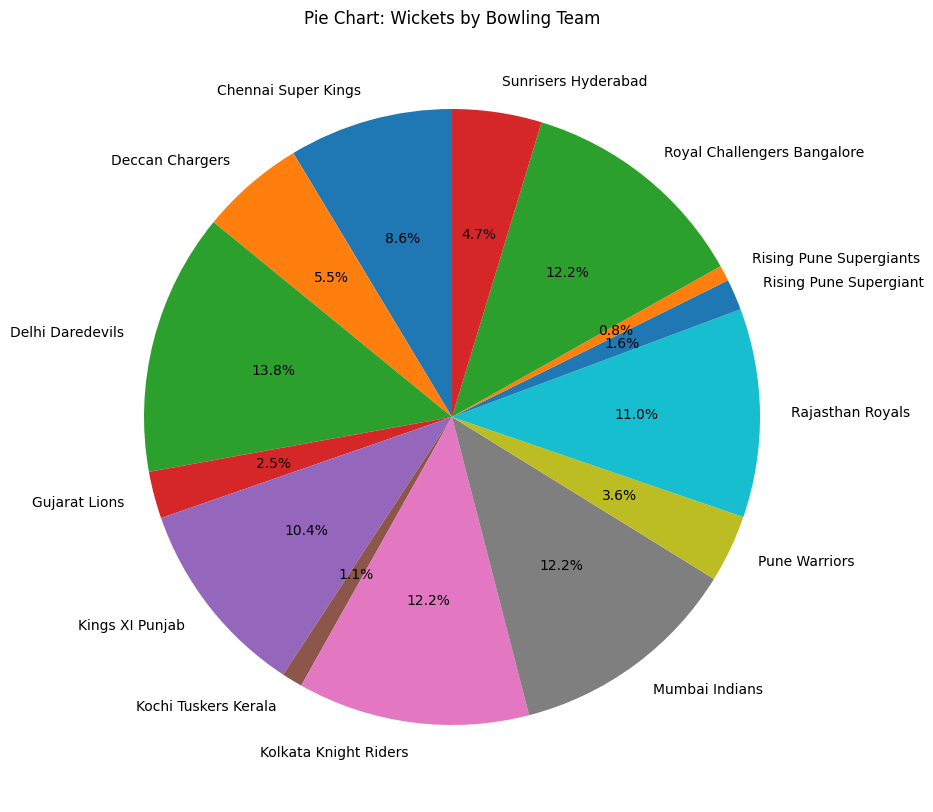

In [204]:
#4. Wickets by the Bowling team
wickets_by_team = ipl_df.groupby('bowl_team')['wickets'].sum()
plt.figure(figsize=(10, 10))  
plt.pie(wickets_by_team, labels=wickets_by_team.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Wickets by Bowling Team')
plt.tight_layout
plt.show()


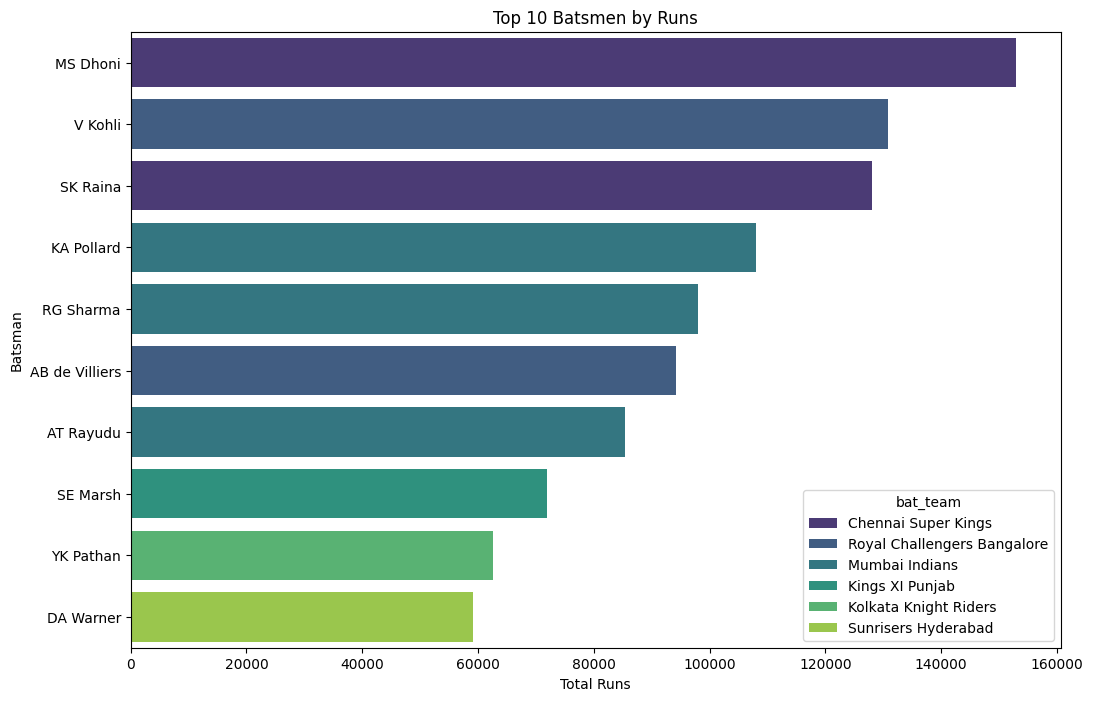

In [205]:
#5 Top 10 Batsmen by Runs
top_batsmen = ipl_df.groupby(['batsman', 'bat_team'])['runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by='runs', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='runs', y='batsman', hue='bat_team', data=top_batsmen, palette='viridis')
plt.title('Top 10 Batsmen by Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()


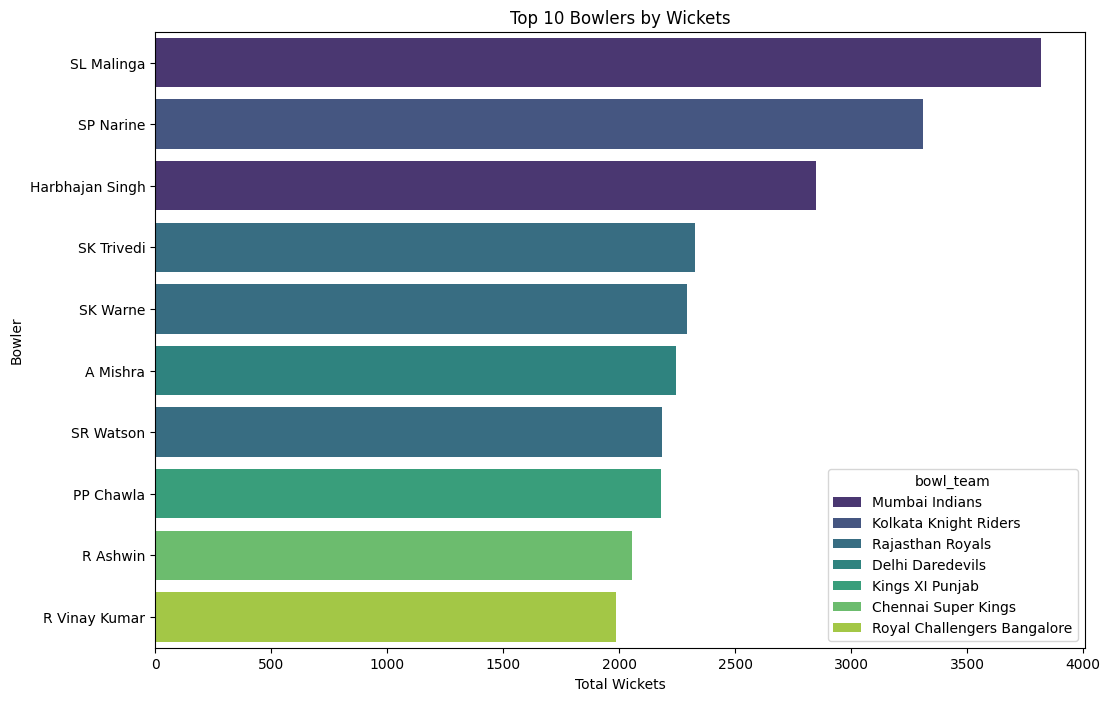

In [206]:
#6. Top 10 bowlers by Wickets
top_bowlers = ipl_df.groupby(['bowler', 'bowl_team'])['wickets'].sum().reset_index()
top_bowlers = top_bowlers.sort_values(by='wickets', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='wickets', y='bowler', hue='bowl_team', data=top_bowlers, palette='viridis')
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


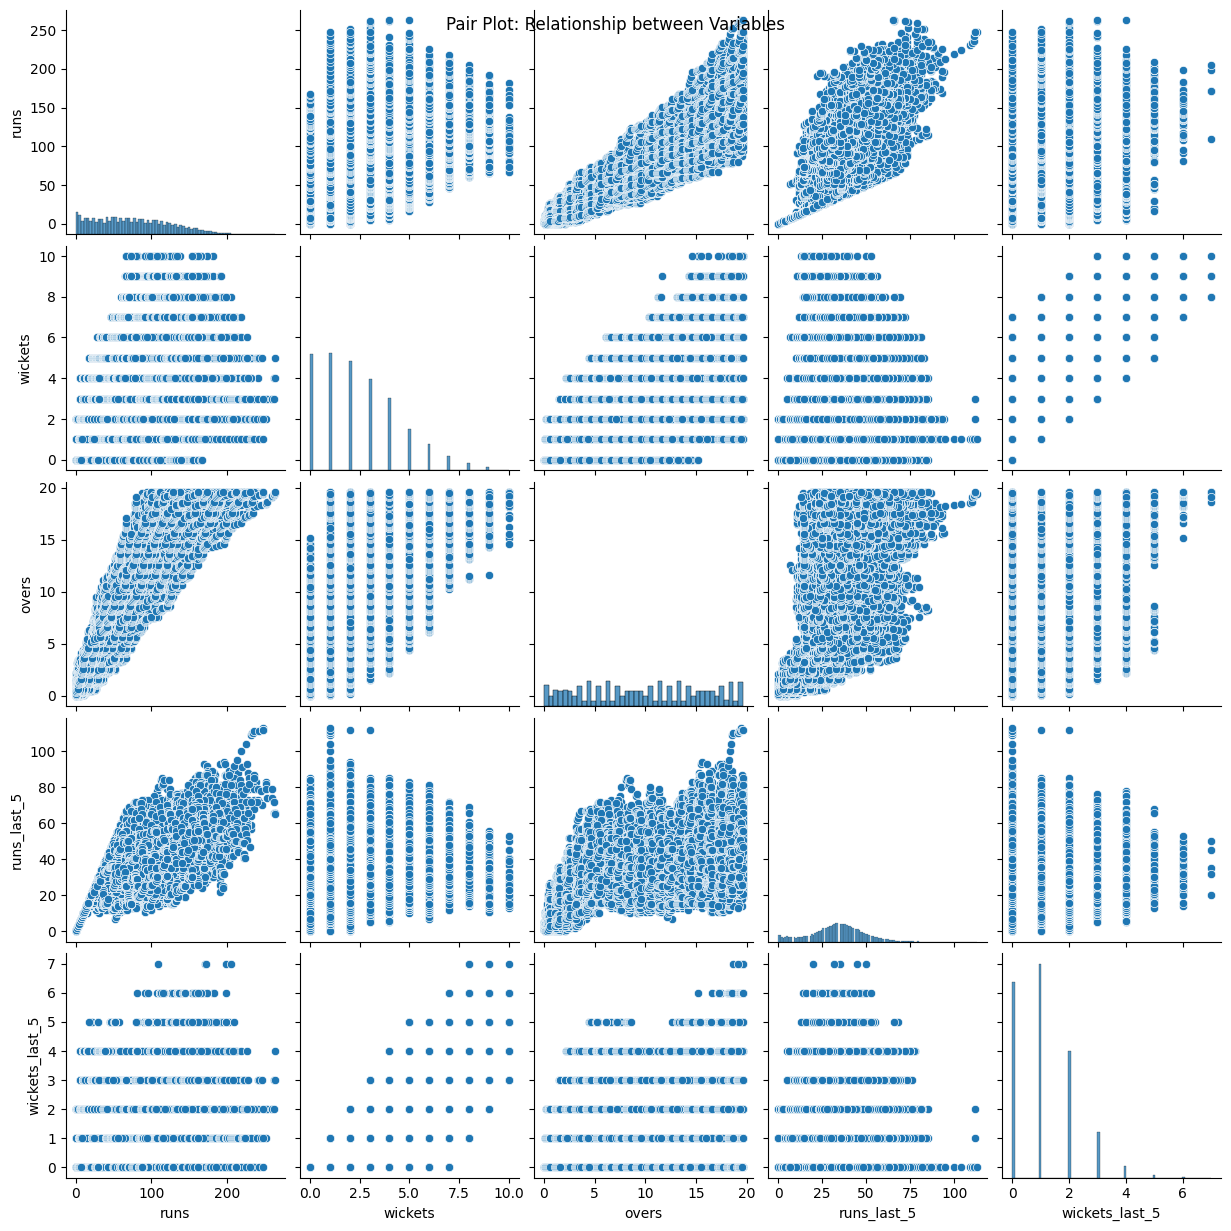

In [207]:
#7. Relation between runs, wickets, overs, runs_last_5, wickets_last_5 
sns.pairplot(ipl_df[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']])
plt.suptitle('Pair Plot: Relationship between Variables')
plt.tight_layout
plt.show()


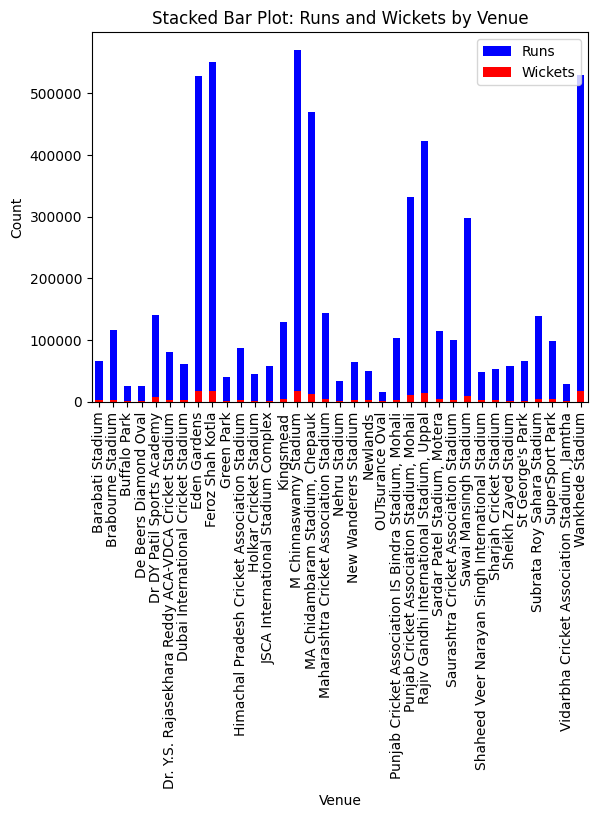

In [208]:
#8. Runs and wickets at a particular venue
venue_runs = ipl_df.groupby('venue')['runs'].sum()
venue_wickets = ipl_df.groupby('venue')['wickets'].sum()

fig, ax = plt.subplots()
venue_runs.plot(kind='bar', stacked=True, color='b', ax=ax, label='Runs')
venue_wickets.plot(kind='bar', stacked=True, color='r', ax=ax, label='Wickets')

plt.title('Stacked Bar Plot: Runs and Wickets by Venue')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.legend()
plt.show()


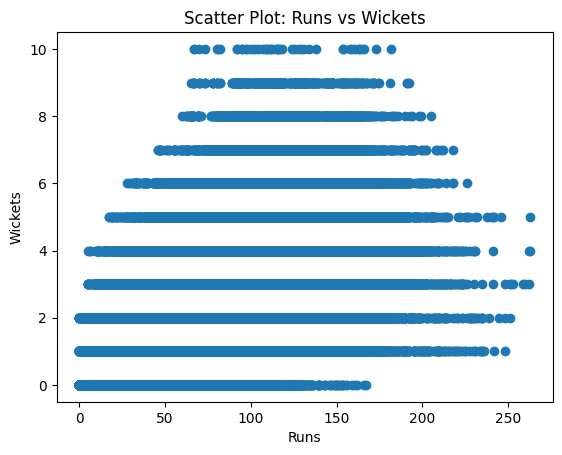

In [209]:
#9. Runs vs Wickets
plt.scatter(ipl_df['runs'], ipl_df['wickets'])
plt.title('Scatter Plot: Runs vs Wickets')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.show()


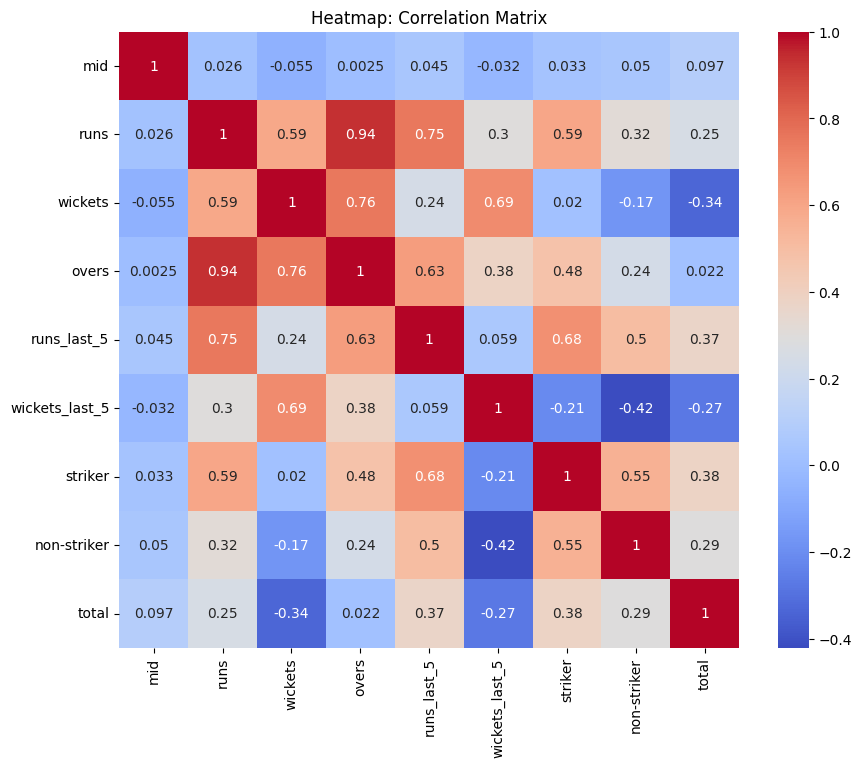

In [210]:
#10. Correlation Heatmap
numeric_columns = ipl_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))  

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()


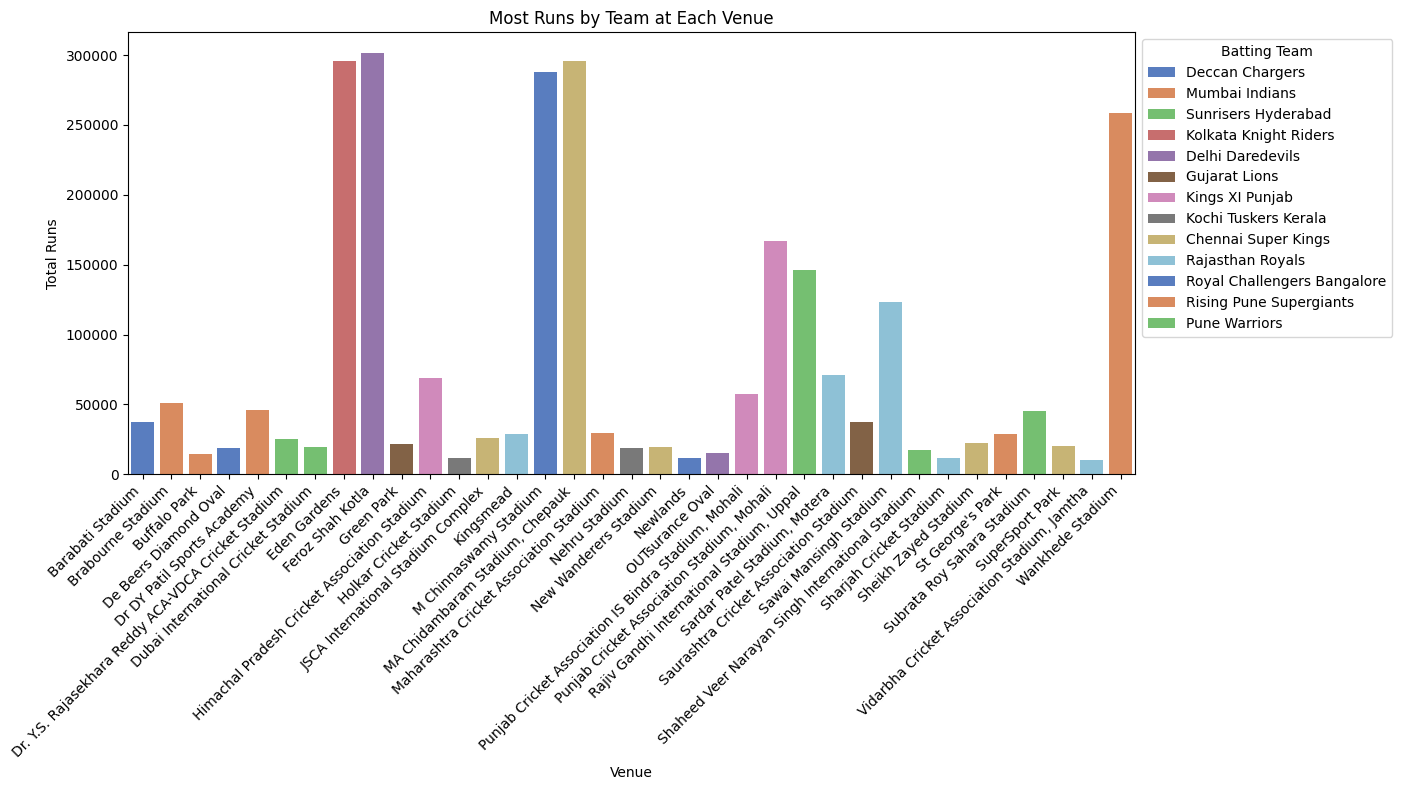

In [211]:
#11 Most Runs by a team at each venue
venue_runs = ipl_df.groupby(['venue', 'bat_team'])['runs'].sum().reset_index()
max_runs_team_at_venue = venue_runs.loc[venue_runs.groupby('venue')['runs'].idxmax()]

plt.figure(figsize=(14, 8))
sns.barplot(x='venue', y='runs', hue='bat_team', data=max_runs_team_at_venue, palette='muted')
plt.title('Most Runs by Team at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.legend(title='Batting Team', bbox_to_anchor=(1, 1))
plt.tight_layout()  
plt.show()


# Analyzing the Data by using Group By function

In [212]:
# 1. Average Runs by Batting Team:
average_runs_by_team = ipl_df.groupby('bat_team')['runs'].mean()
print("1. Average Runs by Batting Team:")
print(average_runs_by_team, "\n\n")

# 2. Total Wickets by Bowling Team:
total_wickets_by_team = ipl_df.groupby('bowl_team')['wickets'].sum()
print("2. Total Wickets by Bowling Team:")
print(total_wickets_by_team, "\n\n")

# 3. Maximum Runs Scored in a Single Match:
max_runs_in_a_match = ipl_df.groupby('mid')['runs'].max()
print("3. Maximum Runs Scored in a Single Match:")
print(max_runs_in_a_match.max(), "\n\n")

# 4. Average Runs in Last 5 Overs:
average_runs_last_5_overs = ipl_df.groupby('bat_team')['runs_last_5'].mean()
print("4. Average Runs in Last 5 Overs:")
print(average_runs_last_5_overs, "\n\n")

# 5. Maximum Wickets Lost in a Single Match:
max_wickets_in_a_match = ipl_df.groupby('mid')['wickets'].max()
print("5. Maximum Wickets Lost in a Single Match:")
print(max_wickets_in_a_match.max(), "\n\n")

# 6. Total Runs by Venue:
total_runs_by_venue = ipl_df.groupby('venue')['runs'].sum()
print("6. Total Runs by Venue:")
print(total_runs_by_venue, "\n\n")

# 7. Total Runs and Wickets for Each Batting Team:
total_runs_and_wickets_by_batting_team = ipl_df.groupby('bat_team').agg({'runs': 'sum', 'wickets': 'sum'})
print("7. Total Runs and Wickets for Each Batting Team:")
print(total_runs_and_wickets_by_batting_team, "\n\n")

# 8. Average Runs per Over:
average_runs_per_over = ipl_df.groupby('overs')['runs'].mean()
print("8. Average Runs per Over:")
print(average_runs_per_over, "\n\n")

# 9. Maximum Runs Scored by a Batsman in a Single Match:
max_runs_by_batsman = ipl_df.groupby(['mid', 'batsman'])['runs'].sum().groupby('batsman').max()
print("9. Maximum Runs Scored by a Batsman in a Single Match:")
print(max_runs_by_batsman, "\n\n")

# 10. Total Matches Played at Each Venue:
total_matches_by_venue = ipl_df['venue'].value_counts()
print("10. Total Matches Played at Each Venue:")
print(total_matches_by_venue, "\n\n")




1. Average Runs by Batting Team:
bat_team
Chennai Super Kings            77.008204
Deccan Chargers                73.810417
Delhi Daredevils               73.453440
Gujarat Lions                  78.856315
Kings XI Punjab                76.058900
Kochi Tuskers Kerala           72.055936
Kolkata Knight Riders          73.166563
Mumbai Indians                 74.041516
Pune Warriors                  69.837827
Rajasthan Royals               75.700437
Rising Pune Supergiant         76.572435
Rising Pune Supergiants        82.317139
Royal Challengers Bangalore    75.037330
Sunrisers Hyderabad            75.371549
Name: runs, dtype: float64 


2. Total Wickets by Bowling Team:
bowl_team
Chennai Super Kings            15825
Deccan Chargers                10058
Delhi Daredevils               25262
Gujarat Lions                   4535
Kings XI Punjab                19182
Kochi Tuskers Kerala            2007
Kolkata Knight Riders          22343
Mumbai Indians                 22331
Pune Warriors 

# Data Cleaning

In [213]:
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

##### Removing Irrelevant Data colunms

In [214]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Keeping only Consistent Teams 


In [215]:
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [216]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Inconsistent Teams : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Inconsistent Teams : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Remove First 5 Overs of every match

In [217]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


# Data Preprocessing and Encoding

#### Performing Label Encoding

In [218]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


#### Performing One Hot Encoding and Column Transformation

In [219]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')

In [220]:
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))

In [221]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(ipl_df, columns=cols)

In [222]:
# Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


# Model Building

Preparing Train and Test Data

In [223]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [224]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


#### Random Forest Regression

In [225]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [226]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')

Train Score : 99.05%
Test Score : 93.53%


In [227]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.456557558974724
Mean Squared Error (MSE): 58.303668844211934
Root Mean Squared Error (RMSE): 7.635683914634755


# Predictions

In [228]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

# Test Cases

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [229]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 145 || Actual Score : 147


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [230]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 146 || Actual Score : 153


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**


In [231]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 193 || Actual Score : 185


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [232]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 171 || Actual Score : 172


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 5 
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [233]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 106 || Actual Score : 110


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
